#**Predictive Analytics [Breast Cancer](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)**
- **Nama:** Jihan Kusumawardhani
- **Email:** jihankusumawwardhani@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/jihankusumawardhani
- **Modul:** Submission 1 Machine Learning Terapan
-**Dataset:** [Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

# 1.Mengambil data dari kaggle

In [2]:
!pip install -q kaggle

Kode ini digunakan untuk **menginstal *library* resmi dari Kaggle**.

* `!pip install`: Perintah untuk menginstal sebuah pustaka Python.
* `kaggle`: Nama pustaka yang diinstal, yang berfungsi sebagai antarmuka baris perintah (CLI) untuk berinteraksi dengan platform Kaggle.
* `-q`: Opsi untuk mode "quiet" (senyap), yang berarti proses instalasi tidak akan menampilkan banyak teks atau log, membuat output lebih bersih.


# 2. Mengimpor pustaka/modul python yang dibutuhkan

In [3]:
#Import Load data Library
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# Import train test split
from sklearn.model_selection import train_test_split
# Import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# Import MinMaxScaler and StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Import Model
from sklearn.neighbors import KNeighborsClassifier # --> KNN
from sklearn.ensemble import RandomForestClassifier # --> RF
from sklearn.metrics import accuracy_score # --> matrix accuracy
from sklearn.svm import SVC # --> SVM
from sklearn.naive_bayes import BernoulliNB # --> Naive bayes
from sklearn.ensemble import ExtraTreesClassifier # --> Extra Trees Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.naive_bayes import GaussianNB

In [6]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [7]:
!kaggle datasets download -d yasserh/breast-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
License(s): CC0-1.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 167MB/s]


In [8]:
zip_ref = zipfile.ZipFile('/content/breast-cancer-dataset.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Dari kode impor di atas, kita dapat melihat beberapa pustaka (library) dan modul yang dimuat, dikelompokkan berdasarkan fungsinya:

* Terdapat pustaka untuk **Pemuatan dan Manipulasi Data**, yaitu: `pandas` (untuk mengelola DataFrame), `files` dari `google.colab` (untuk mengunggah file di Colab), dan `zipfile` (untuk menangani file .zip).

* Terdapat pustaka untuk **Visualisasi Data**, yaitu: `matplotlib.pyplot` dan `seaborn` untuk membuat berbagai macam plot dan grafik.

* Terdapat modul untuk **Persiapan Data (Preprocessing)**, yaitu: `train_test_split` (untuk membagi data menjadi data latih dan data uji) dan `MinMaxScaler` (untuk mengubah skala nilai fitur).

* Terdapat berbagai **Model Machine Learning** untuk klasifikasi, yaitu: `KNeighborsClassifier` (KNN), `RandomForestClassifier` (RF), `SVC` (SVM), `BernoulliNB` dan `GaussianNB` (Naive Bayes), `ExtraTreesClassifier`, `xgboost`, `lightgbm`, dan `LogisticRegression`.

* Terdapat modul untuk **Evaluasi Model**, yaitu: `accuracy_score` untuk mengukur tingkat akurasi dari prediksi model.

# 3. Data Understanding

## 3.1 Memuat Data pada sebuah Dataframe menggunakan pandas

In [9]:
df = pd.read_csv('/content/breast-cancer.csv')

## 3.2 Memuat Info/type kolom pada dataset

In [10]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Dari dataframe di atas, kita dapat melihat bahwa dataset ini (dikenal sebagai Wisconsin Breast Cancer dataset) memiliki banyak kolom fitur. Berikut adalah penjelasan untuk 10 fitur utamanya:

* `diagnosis` : Hasil diagnosis tumor, biasanya berupa kategori (misalnya 'M' untuk Ganas dan 'B' untuk Jinak).
* `radius_mean` : Rata-rata jari-jari dari inti sel tumor.
* `texture_mean` : Rata-rata tekstur, yang diukur dari standar deviasi nilai *grayscale* pada citra inti sel.
* `perimeter_mean` : Rata-rata keliling inti sel tumor.
* `area_mean` : Rata-rata luas inti sel tumor.
* `smoothness_mean` : Rata-rata kehalusan kontur inti sel.
* `compactness_mean` : Rata-rata tingkat kepadatan inti sel (dihitung dari `perimeter` dan `area`).
* `concavity_mean` : Rata-rata tingkat kecekungan pada kontur inti sel.
* `concave points_mean` : Rata-rata jumlah titik cekung pada kontur inti sel.
* `symmetry_mean` : Rata-rata simetri inti sel.
* `fractal_dimension_mean`: Rata-rata dimensi fraktal dari kontur inti sel.

Kolom-kolom lain dengan akhiran `_se` (standard error) dan `_worst` (nilai
terburuk atau terbesar) adalah pengukuran statistik turunan dari 10 fitur utama di atas.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dari eksekusi method `df.info()` pada gambar tersebut, dapat disimpulkan, terdapat **32 kolom numerik**, yang terdiri dari:
    
* **30 kolom** dengan tipe data `float64` (contoh: `radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`, dan seterusnya).

* **1 kolom** dengan tipe data `int64`, yaitu `id`.

* Terdapat **1 kolom** dengan tipe data `object`, yaitu `diagnosis`.

Kolom `diagnosis` yang bertipe `object` ini merupakan kolom target atau label. Meskipun tipe datanya bukan angka, ini sudah sesuai karena kolom ini berisi kategori (misalnya 'M' untuk *Malignant* dan 'B' untuk *Benign*). Nantinya, kolom ini perlu diubah menjadi format numerik (misalnya 0 dan 1) agar dapat diproses oleh model machine learning.

In [12]:
# Menghitung jumlah data kosong pada setiap kolom
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [13]:
# Memuat ukuran shape pada dataframe
df.shape

(569, 32)

Dari eksekusi method` df.shape` Terlihat:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 569 | 32 |


<br>

In [14]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

## 3.3 Visualisasi Data

In [15]:
# membagi dataset menjadi 2 bagian yaitu kategorial dan numerik
categorical_features = ['diagnosis']
numerical_features = [
                      'radius_mean',
                      'texture_mean',
                      'perimeter_mean',
                      'area_mean',
                      'smoothness_mean',
                      'compactness_mean',
                      'concavity_mean',
                      'concave points_mean',
                      'symmetry_mean',
                      'fractal_dimension_mean',
                      'radius_se',
                      'texture_se',
                      'perimeter_se',
                      'area_se',
                      'smoothness_se',
                      'compactness_se',
                      'concavity_se',
                      'concave points_se',
                      'symmetry_se',
                      'fractal_dimension_se',
                      'radius_worst',
                      'texture_worst',
                      'perimeter_worst',
                      'area_worst',
                      'smoothness_worst',
                      'compactness_worst',
                      'concavity_worst',
                      'concave points_worst',
                      'symmetry_worst',
                      'fractal_dimension_worst'
                      ]

### 3.3.1 Distribusi Kolom Kategorial

           jumlah sampel  persentase
diagnosis                           
B                    357        62.7
M                    212        37.3


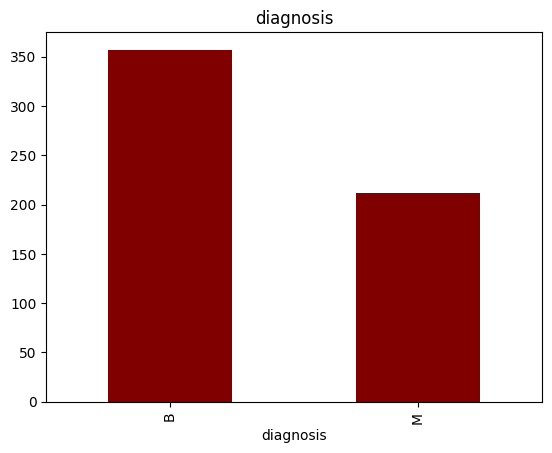

In [16]:
import pandas as pd
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature, color='maroon');

* **Pemilihan dan Perhitungan Fitur:**
    * `feature = categorical_features[0]`: Memilih satu nama fitur dari sebuah list `categorical_features`. Berdasarkan outputnya, fitur yang terpilih adalah `diagnosis`.
    * `count = df[feature].value_counts()`: Menghitung jumlah sampel untuk setiap nilai unik dalam kolom `diagnosis`. (Contoh: 357 sampel untuk kelas 0, dan 212 untuk kelas 1).
    * `percent = 100*df[feature].value_counts(normalize=True)`: Menghitung persentase untuk setiap nilai unik.

* **Pembuatan DataFrame Ringkasan:**
    * `data = pd.DataFrame(...)`: Membuat sebuah DataFrame baru bernama `data` yang berisi ringkasan dari hasil perhitungan `jumlah sampel` dan `persentase`.
    * `print(data)`: Menampilkan DataFrame ringkasan tersebut, seperti yang terlihat pada output di bawah kode.

* **Visualisasi Data:**
    * `count.plot(kind='bar', ...)`: Membuat visualisasi dalam bentuk **diagram batang (bar chart)** dari data `count`.
    * Plot ini secara visual menunjukkan perbandingan jumlah sampel antara kelas 0 dan kelas 1 pada fitur `diagnosis`.

### 3.3.2 Distribusi Kolom Numerik

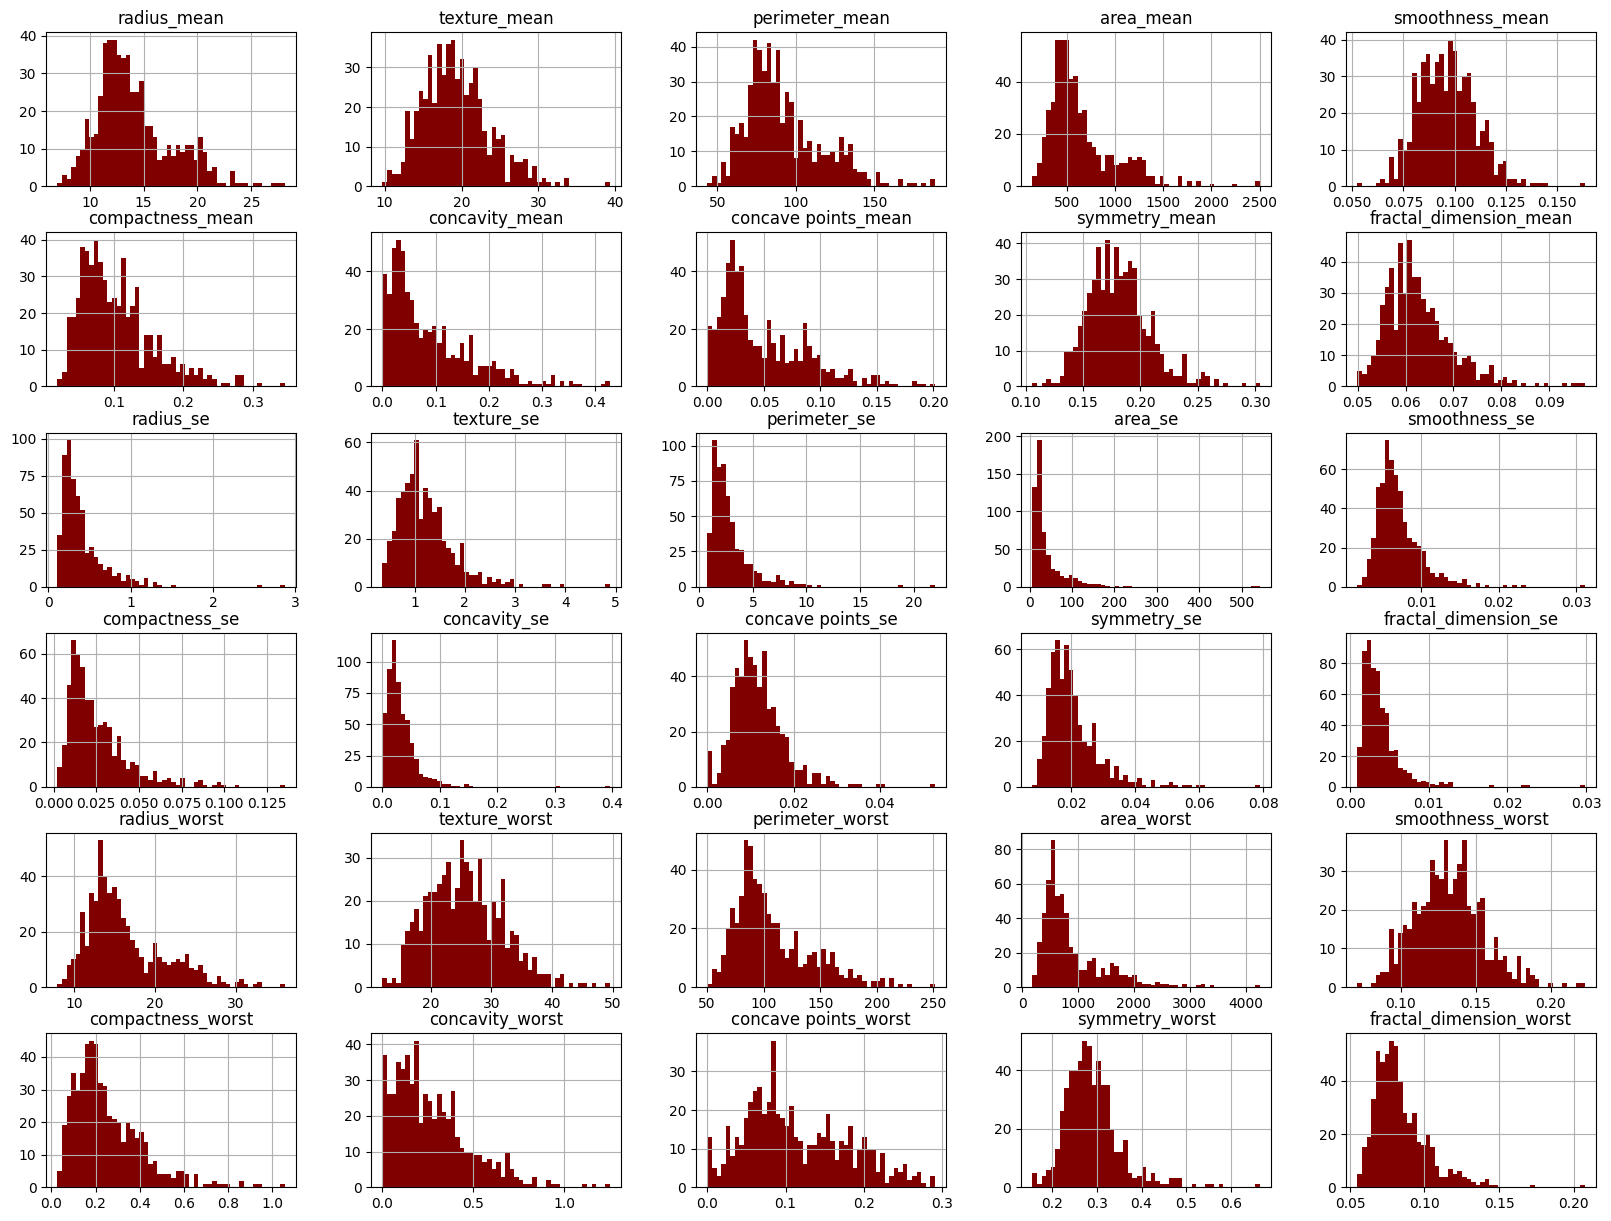

In [17]:
df[numerical_features].hist(bins=50, figsize=(20,15), color='maroon')
plt.show()

### 3.3.3 Korelasi pada tiap kolom

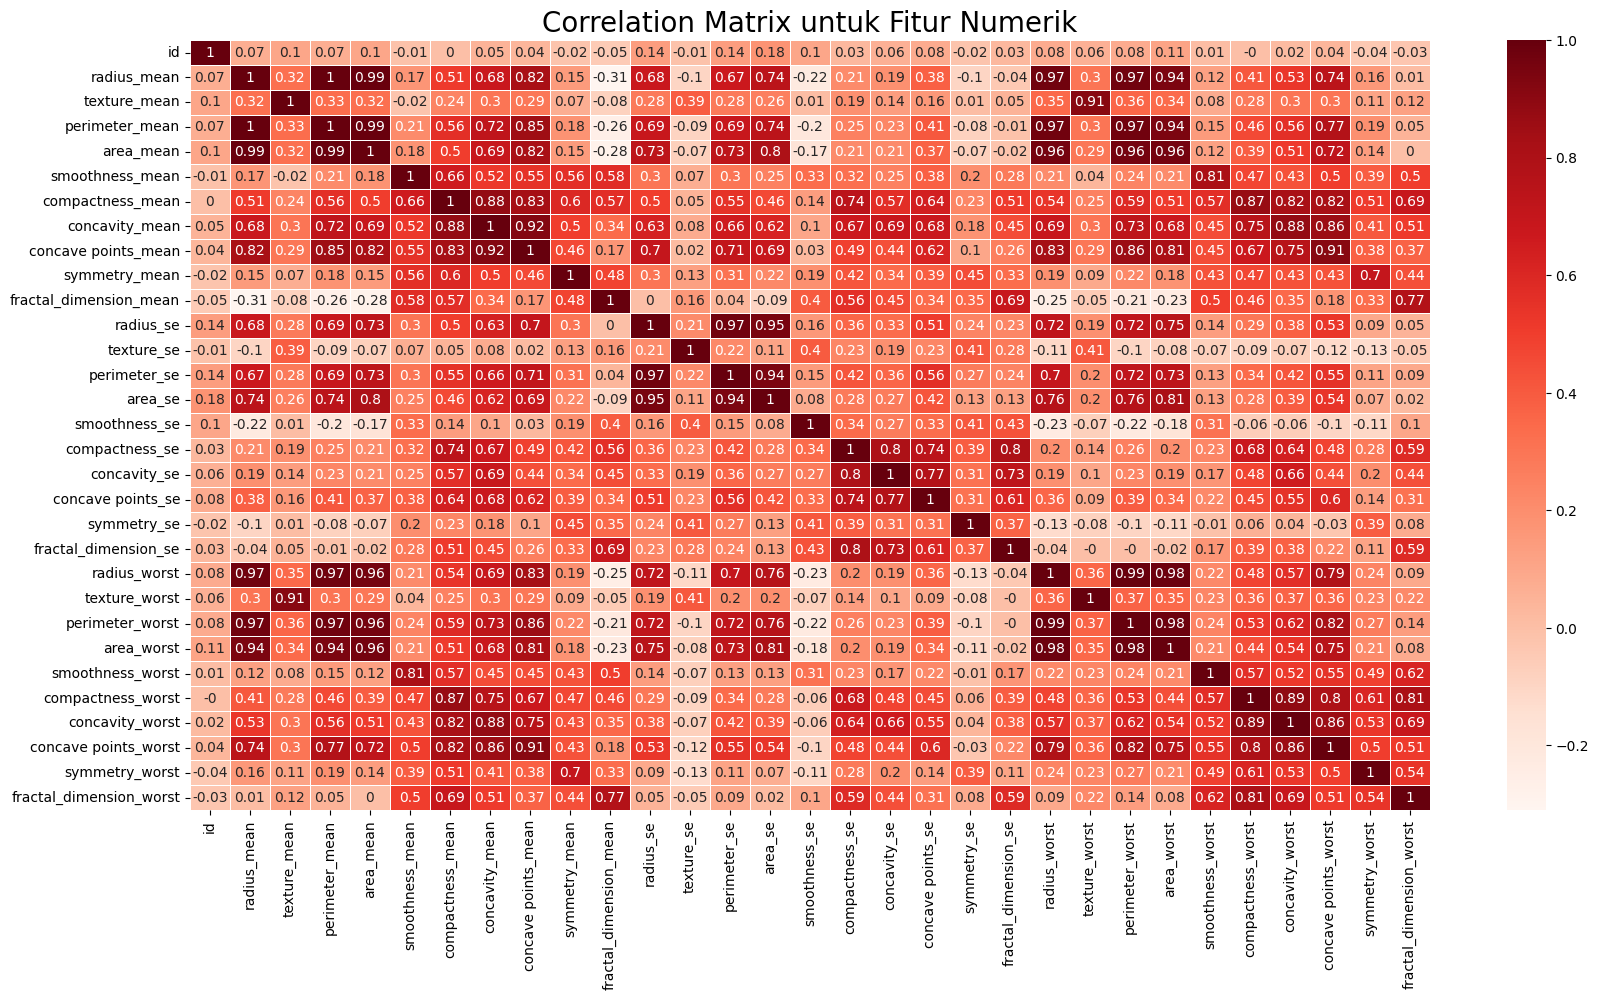

In [18]:
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr().round(2)
plt.figure(figsize=(20, 10)) # Lebih lebar
sns.heatmap(data=correlation_matrix, annot=True, cmap='Reds', linewidths=0.5) # Warna maroon mendekati merah
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

# 4. Persiapan Data (Data Preparation)

### 4.1 Melakukan eksplorasi pada kolom `diagnosis` (target) untuk mengidentifikasi nilai unik yang bertipe *object* sebagai persiapan untuk tahap transformasi data.

In [19]:
print("Unique Values for Diagnosis", df['diagnosis'].unique())

Unique Values for Diagnosis ['M' 'B']


In [20]:
oh = OneHotEncoder()

### 4.2 Langkah ini mencakup proses pengkodean ulang (mapping) pada kolom target diagnosis untuk mengubah format datanya dari tipe object menjadi representasi integer numerik, sebuah prasyarat fundamental agar data dapat diinterpretasikan secara efektif oleh model machine learning

In [21]:
diagnosis_mapping = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 4.3 Melakukan perhitungan jumlah baris terhadap kolom target.

In [22]:
df.diagnosis.value_counts()

,count
diagnosis,
0,357
1,212


### 4.4 Melakukan pembagian dataset:


*    train_test_split





In [23]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [25]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 569
Total # of sample in train dataset: 455
Total # of sample in test dataset: 114


### 4.6 Melakukan Standard Scaler

In [26]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5. Pembuatan Model

### 5.1 Algoritma Random Forest

In [27]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Pengujian model terhadap data test
RF_pred = RF.predict(X_test)

In [29]:
accuracy_score(y_test, RF_pred)

0.9736842105263158

In [30]:
RF_cr = classification_report(y_test, RF_pred, output_dict=True)
pd.DataFrame(RF_cr).transpose()

,precision,recall,f1-score,support
0,0.956522,1.000000,0.977778,66.000000
1,1.000000,0.937500,0.967742,48.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.978261,0.968750,0.972760,114.000000
weighted avg,0.974828,0.973684,0.973552,114.000000


### 5.2 Algoritma K-Nearest Neighbor

In [31]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# Pengujian model terhadap data test
KNN_pred = KNN.predict(X_test)

In [33]:
accuracy_score(y_test, KNN_pred)

0.9649122807017544

In [34]:
KNN_cr = classification_report(y_test, KNN_pred, output_dict=True)
pd.DataFrame(KNN_cr).transpose()

,precision,recall,f1-score,support
0,0.942857,1.000000,0.970588,66.000000
1,1.000000,0.916667,0.956522,48.000000
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.971429,0.958333,0.963555,114.000000
weighted avg,0.966917,0.964912,0.964666,114.000000


### 5.3 Algoritma Support Vector Machine

In [35]:
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [36]:
# Pengujian model terhadap data test
SVM_pred = SVM.predict(X_test)

In [37]:
accuracy_score(y_test, RF_pred)

0.9736842105263158

In [38]:
SVM_cr = classification_report(y_test, SVM_pred, output_dict=True)
pd.DataFrame(SVM_cr).transpose()

,precision,recall,f1-score,support
0,0.955224,0.969697,0.962406,66.00000
1,0.957447,0.937500,0.947368,48.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.956335,0.953598,0.954887,114.00000
weighted avg,0.956160,0.956140,0.956074,114.00000


### 5.4 Algoritma Gradient Boosting Machines


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier()
GBM.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
GBM_pred = GBM.predict(X_test)

In [41]:
GBM_cr = classification_report(y_test, GBM_pred, output_dict=True)
pd.DataFrame(GBM_cr).transpose()

,precision,recall,f1-score,support
0,0.942857,1.000000,0.970588,66.000000
1,1.000000,0.916667,0.956522,48.000000
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.971429,0.958333,0.963555,114.000000
weighted avg,0.966917,0.964912,0.964666,114.000000


### 5.5 Algoritma Logistic Regression

In [42]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [43]:
LR_pred = LR.predict(X_test)

In [44]:
LR_cr = classification_report(y_test, LR_pred, output_dict=True)
pd.DataFrame(LR_cr).transpose()

,precision,recall,f1-score,support
0,0.970149,0.984848,0.977444,66.000000
1,0.978723,0.958333,0.968421,48.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.974436,0.971591,0.972932,114.000000
weighted avg,0.973759,0.973684,0.973645,114.000000


### 5.6 Algoritma Gaussian Naive Bayes

In [45]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [46]:
GNB_pred = GNB.predict(X_test)
accuracy_score(y_test, GNB_pred)

0.9298245614035088

In [47]:
GNB_cr = classification_report(y_test, GNB_pred, output_dict=True)
pd.DataFrame(GNB_cr).transpose()

,precision,recall,f1-score,support
0,0.939394,0.939394,0.939394,66.000000
1,0.916667,0.916667,0.916667,48.000000
accuracy,0.929825,0.929825,0.929825,0.929825
macro avg,0.928030,0.928030,0.928030,114.000000
weighted avg,0.929825,0.929825,0.929825,114.000000


# 6. Evaluasi Model

### 6.1 Perbandingan metriks antara model

In [48]:
RF_cr['accuracy']

0.9736842105263158

In [56]:
all_metrics = {
    'accuracy': [
        RF_cr['accuracy'],
        KNN_cr['accuracy'],
        SVM_cr['accuracy'],
        GBM_cr['accuracy'],
        LR_cr['accuracy'],
        GNB_cr['accuracy']
    ],
    'f1-score_0': [
        RF_cr['0']['f1-score'],
        KNN_cr['0']['f1-score'],
        SVM_cr['0']['f1-score'],
        GBM_cr['0']['f1-score'],
        LR_cr['0']['f1-score'],
        GNB_cr['0']['f1-score']
    ],
    'precision_0': [
        RF_cr['0']['precision'],
        KNN_cr['0']['precision'],
        SVM_cr['0']['precision'],
        GBM_cr['0']['precision'],
        LR_cr['0']['precision'],
        GNB_cr['0']['precision']
    ],
    'recall_0': [
        RF_cr['0']['recall'],
        KNN_cr['0']['recall'],
        SVM_cr['0']['recall'],
        GBM_cr['0']['recall'],
        LR_cr['0']['recall'],
        GNB_cr['0']['recall']
    ],
    'f1-score_1': [
        RF_cr['1']['f1-score'],
        KNN_cr['1']['f1-score'],
        SVM_cr['1']['f1-score'],
        GBM_cr['1']['f1-score'],
        LR_cr['1']['f1-score'],
        GNB_cr['1']['f1-score']
    ],
    'precision_1': [
        RF_cr['1']['precision'],
        KNN_cr['1']['precision'],
        SVM_cr['1']['precision'],
        GBM_cr['1']['precision'],
        LR_cr['1']['precision'],
        GNB_cr['1']['precision']
    ],
    'recall_1': [
        RF_cr['1']['recall'],
        KNN_cr['1']['recall'],
        SVM_cr['1']['recall'],
        GBM_cr['1']['recall'],
        LR_cr['1']['recall'],
        GNB_cr['1']['recall']
    ]
}


all_model_names = [
    'RF',
    'KNN',
    'SVM',
    'GBM',
    'LogisticRegression',
    'Gaussian Naive Bayes'
]


metrics = pd.DataFrame(all_metrics, index=all_model_names)

# Definisikan struktur MultiIndex untuk header kolom
multiheader = [
    ('', 'accuracy'),
    ('Class 0', 'f1-score'),
    ('Class 0', 'precision'),
    ('Class 0', 'recall'),
    ('Class 1', 'f1-score'),
    ('Class 1', 'precision'),
    ('Class 1', 'recall')
]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)

# Menampilkan dataframe perbandingan akhir
metrics

Class 0                       Class 1  \
                      accuracy  f1-score precision    recall  f1-score   
RF                    0.973684  0.977778  0.956522  1.000000  0.967742   
KNN                   0.964912  0.970588  0.942857  1.000000  0.956522   
SVM                   0.956140  0.962406  0.955224  0.969697  0.947368   
GBM                   0.964912  0.970588  0.942857  1.000000  0.956522   
LogisticRegression    0.973684  0.977444  0.970149  0.984848  0.968421   
Gaussian Naive Bayes  0.929825  0.939394  0.939394  0.939394  0.916667   

                                          
                     precision    recall  
RF                    1.000000  0.937500  
KNN                   1.000000  0.916667  
SVM                   0.957447  0.937500  
GBM                   1.000000  0.916667  
LogisticRegression    0.978723  0.958333  
Gaussian Naive Bayes  0.916667  0.916667

# 6.2 Confussion Matrix

### 6.2.1 Visualisasi Algoritma Random Forest

<Axes: >

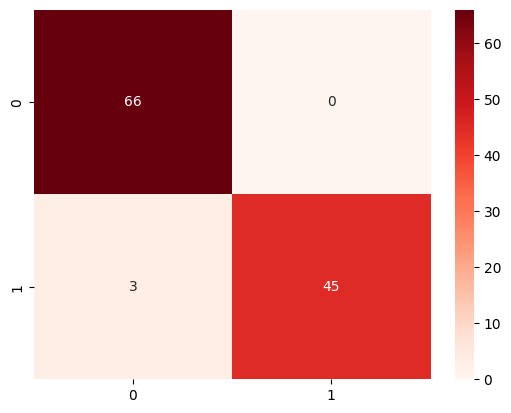

In [50]:
RF_cm = confusion_matrix(y_test,RF_pred)
sns.heatmap(RF_cm,annot=True,fmt="d", cmap='Reds')

### 6.2.2 Visualisasi Algoritma K-Nearest Neighbor

<Axes: >

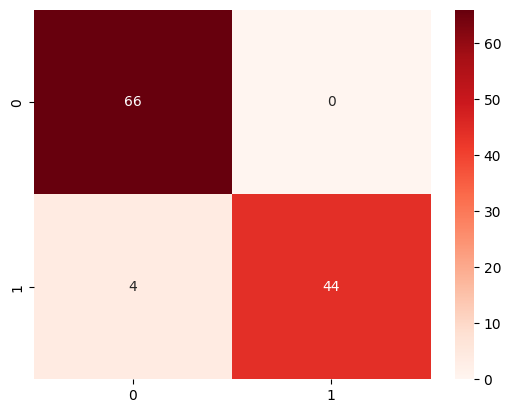

In [51]:
KNN_cm = confusion_matrix(y_test,KNN_pred)
sns.heatmap(KNN_cm,annot=True,fmt="d", cmap='Reds')

### 6.2.2 Visualisasi Algoritma Support Vector Machine

<Axes: >

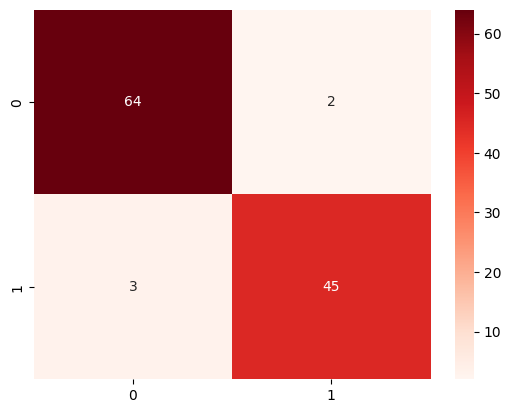

In [52]:
SVM_cm = confusion_matrix(y_test,SVM_pred)
sns.heatmap(SVM_cm,annot=True,fmt="d", cmap='Reds')

### 6.2.2 Visualisasi Algoritma Gradient Boosting Machines

<Axes: >

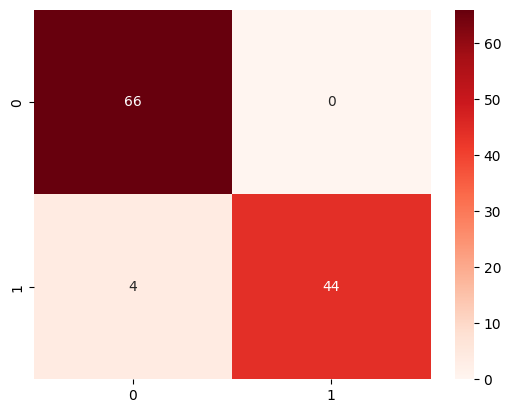

In [53]:
GBM_cm = confusion_matrix(y_test,GBM_pred)
sns.heatmap(GBM_cm,annot=True,fmt="d",cmap='Reds' )

### 6.2.2 Visualisasi Algoritma Logistic Regression

<Axes: >

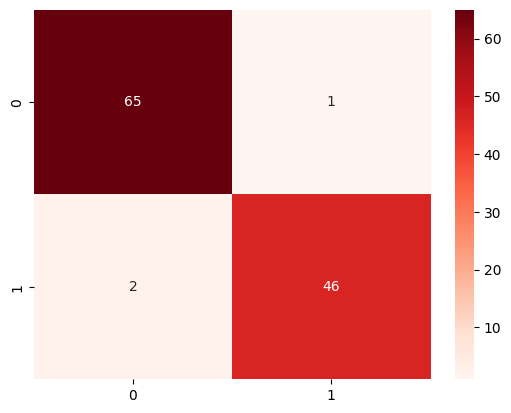

In [54]:
LR_cm = confusion_matrix(y_test,LR_pred)
sns.heatmap(LR_cm,annot=True,fmt="d", cmap='Reds')

### 6.2.2 Visualisasi Algoritma Gaussian Naive Bayes

<Axes: >

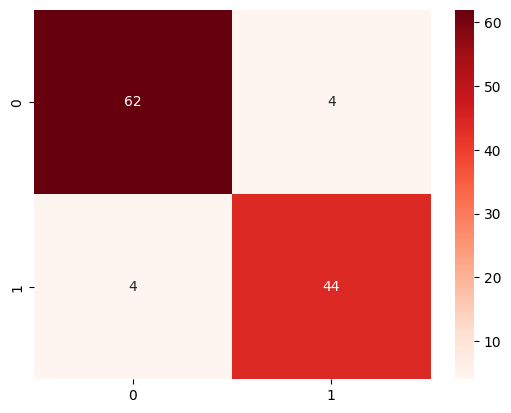

In [55]:
GNB_cm = confusion_matrix(y_test,GNB_pred)
sns.heatmap(GNB_cm,annot=True,fmt="d", cmap='Reds')